# Cats and Dogs Classifier Using CNN

In [1]:
#pip install tensorflow

In [2]:
#pip install keras

#### Dataset

https://github.com/laxmimerit/dog-cat-full-dataset

### Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

In [4]:
keras.__version__

'2.4.3'

In [5]:
tf.__version__

'2.3.1'

## Data Preprocessing

In [6]:
dim = (128, 128, 3)
target_size = dim[:2]
batch_size = 32
epochs = 25

### Generating images for the Training set

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

### Generating images for the Test set

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)

### Creating the Training set

In [9]:
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = target_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

Found 20000 images belonging to 2 classes.


### Creating the Test set

In [10]:
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = target_size,
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 5000 images belonging to 2 classes.


### Data Exploration

In [11]:
# Data labels
classes = training_set.class_indices

In [12]:
# Displaying basic data

print('Image Size (Pixels):', target_size)
print('Color Mode:', training_set.color_mode)
print('Training set:', training_set.n, 'images')
print('Test set:', test_set.n, 'images')
print('Classes:', classes)

Image Size (Pixels): (128, 128)
Color Mode: rgb
Training set: 20000 images
Test set: 5000 images
Classes: {'cats': 0, 'dogs': 1}


In [13]:
encoding = {v: k[:-1] for k, v in classes.items()}
encoding

{0: 'cat', 1: 'dog'}

### Data Visualization

In [14]:
# Loading some images
images, labels = training_set.next()

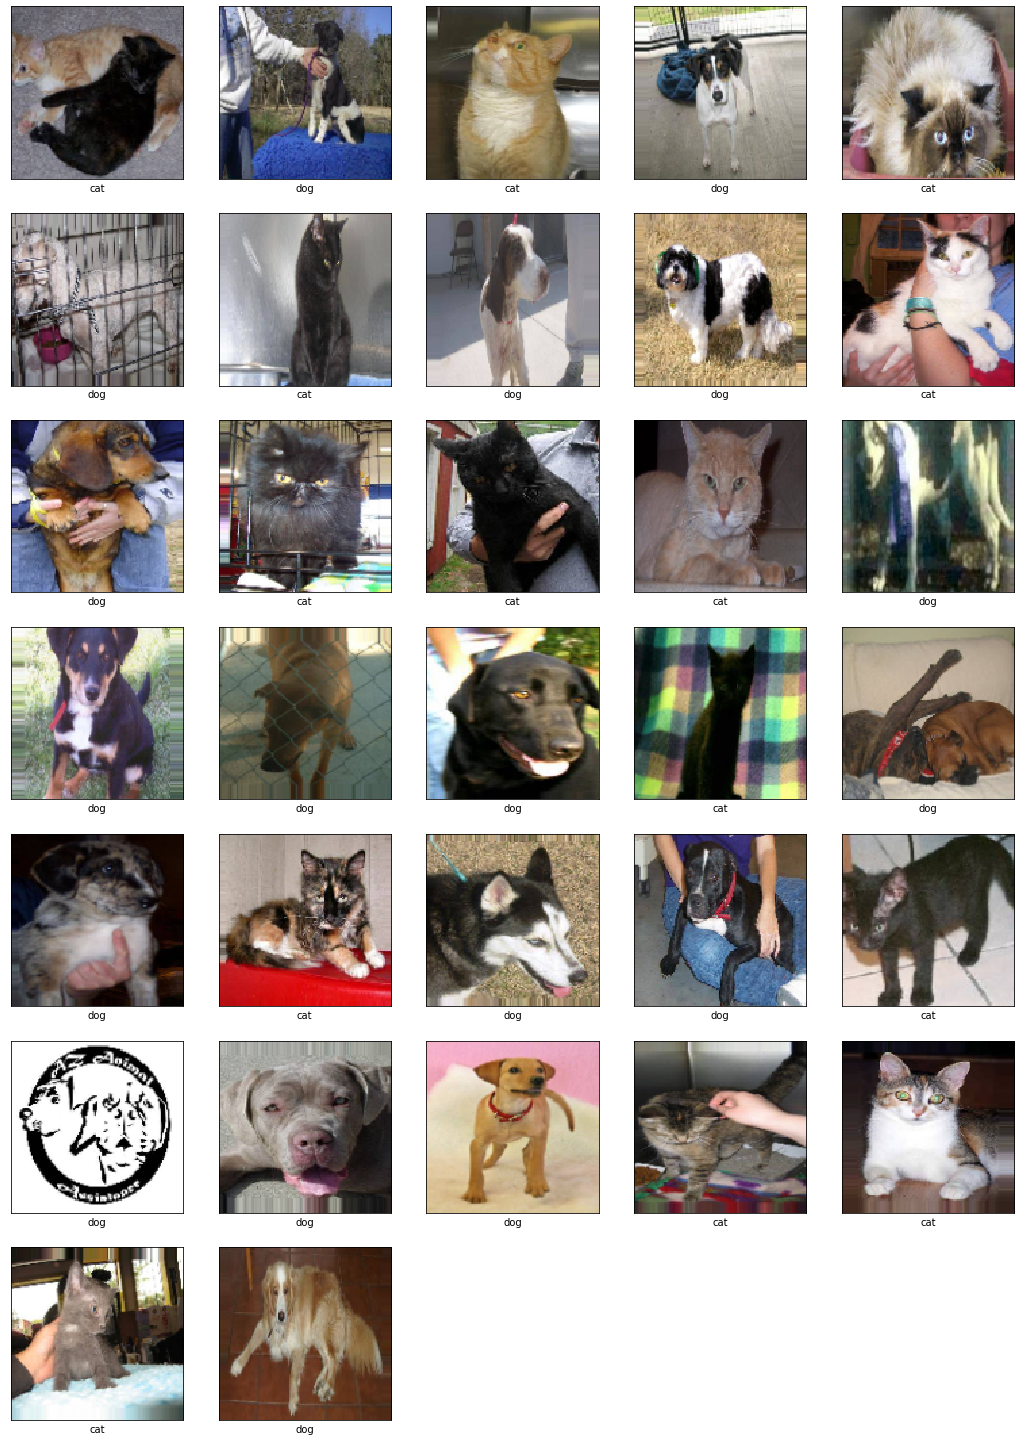

In [15]:
plt.figure(figsize=(18, 26))
for i in range(32):
    plt.subplot(7, 5, i+1)
    plt.xticks([])
    plt.yticks([])

    lbl = int(labels[i])
    plt.xlabel(encoding[lbl])
    plt.imshow(images[i])

plt.show()

## Building the CNN

### Initialising the CNN

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [17]:
cnn = Sequential()

### Convolution and Pooling (first convolutional layer)

In [18]:
cnn.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=dim))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding a second convolutional layer

In [19]:
cnn.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding a third convolutional layer

In [20]:
cnn.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Flattening

In [21]:
cnn.add(Flatten())

### Full Connection

In [22]:
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=64, activation='relu'))

### Output Layer

In [23]:
cnn.add(Dense(units=1, activation='sigmoid'))

## Training the CNN

### Compiling the CNN

In [24]:
cnn.compile(optimizer = 'adam', 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy'])

In [25]:
# Neural Network summary

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

### Training the CNN on the Training set and evaluating it on the Test set

In [26]:
history = cnn.fit(training_set,
                  validation_data = test_set,
                  epochs = epochs)

Epoch 1/25
625/625 [==============================] - 283s 452ms/step - loss: 0.6243 - accuracy: 0.6431 - val_loss: 0.6402 - val_accuracy: 0.6306
Epoch 2/25
625/625 [==============================] - 281s 450ms/step - loss: 0.5360 - accuracy: 0.7263 - val_loss: 0.5353 - val_accuracy: 0.7438
Epoch 3/25
625/625 [==============================] - 281s 449ms/step - loss: 0.4823 - accuracy: 0.7656 - val_loss: 0.4631 - val_accuracy: 0.7816
Epoch 4/25
625/625 [==============================] - 281s 449ms/step - loss: 0.4346 - accuracy: 0.7994 - val_loss: 0.4246 - val_accuracy: 0.8036
Epoch 5/25
625/625 [==============================] - 280s 448ms/step - loss: 0.4080 - accuracy: 0.8141 - val_loss: 0.3982 - val_accuracy: 0.8194
Epoch 6/25
625/625 [==============================] - 281s 449ms/step - loss: 0.3861 - accuracy: 0.8256 - val_loss: 0.4089 - val_accuracy: 0.8284
Epoch 7/25
625/625 [==============================] - 280s 449ms/step - loss: 0.3637 - accuracy: 0.8388 - val_loss: 0.3510 -

In [40]:
cnn.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[-1.12440228e-01, -2.64014006e-01, -1.00249849e-01,
           -1.23356968e-01,  2.32574418e-01,  3.65070030e-02,
            7.06033930e-02, -2.90858954e-01, -2.62133162e-02,
           -1.18706524e-01, -2.26350009e-01, -1.35700226e-01,
            1.29102141e-01, -4.52579781e-02,  6.55881781e-03,
           -1.58844367e-01,  2.61895563e-02,  1.80112034e-01,
            1.04823969e-01, -2.68878371e-01, -2.31176447e-02,
           -2.00616866e-01, -4.49842848e-02, -4.69123013e-02,
            1.10322963e-02,  2.55711794e-01,  6.79793134e-02,
           -8.34524445e-03,  8.65935013e-02, -1.20703224e-02,
            1.47902817e-02, -2.26709973e-02],
          [-7.72353932e-02, -2.55432069e-01,  3.67072895e-02,
           -1.01153120e-01,  3.64108682e-01, -9.39205959e-02,
            9.78884399e-02, -9.22816023e-02,  2.27026865e-02,
           -2.50241995e-01, -1.93744525e-02, -2.09247306e-01,
           -

### Model Evaluation

In [28]:
def report(y_test, y_pred):
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
    import seaborn as sns

    cm = confusion_matrix(y_test, y_pred)
    print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
    print('Precision:', precision_score(y_test, y_pred), sep='\t')
    print('Recall:', recall_score(y_test, y_pred), sep='\t\t')
    print('F1:', f1_score(y_test, y_pred), sep='\t\t')
    print('\n')

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt = 'd', annot_kws={"size": 35}).set_title('Confusion Matrix')
    plt.show()

In [29]:
cnn.evaluate(test_set)

157/157 [==============================] - 23s 144ms/step - loss: 0.3364 - accuracy: 0.8902


[0.33635541796684265, 0.8902000188827515]

In [36]:
# Predicting the Test set results

y_pred = cnn.predict(test_set, verbose=1) 
y_pred = y_pred > 0.5

157/157 [==============================] - 23s 143ms/step


Accuracy:	0.8902
Precision:	0.8750480584390619
Recall:		0.9104
F1:		0.8923740443050383




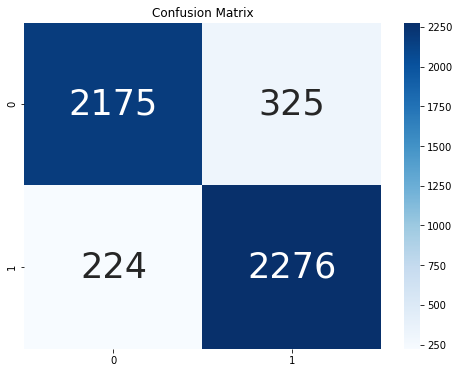

In [37]:
report(test_set.classes, y_pred)

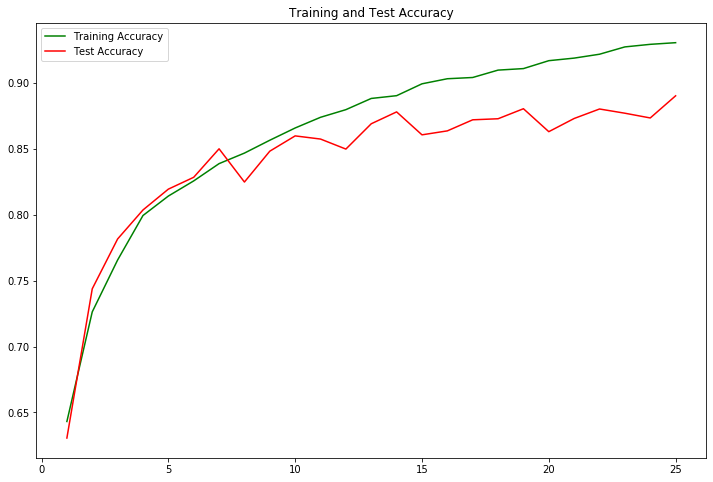

In [129]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, epochs+1), 
         accuracy, 
         color = 'green',
         label = "Training Accuracy")
plt.plot(np.arange(1, epochs+1), 
         val_accuracy, 
         color = 'red',
         label = "Test Accuracy")
plt.legend()
plt.title("Training and Test Accuracy")
plt.show()

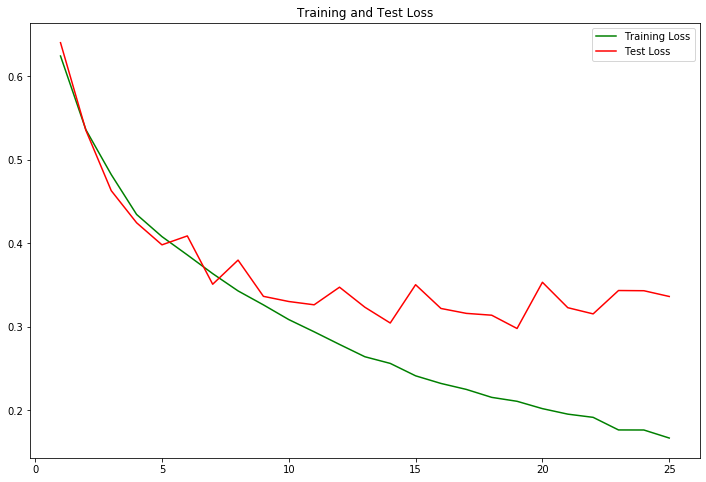

In [130]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, epochs+1), 
         loss, 
         color = 'green',
         label = "Training Loss")
plt.plot(np.arange(1, epochs+1), 
         val_loss, 
         color = 'red',
         label = "Test Loss")
plt.legend()
plt.title("Training and Test Loss")
plt.show()

### More Testing

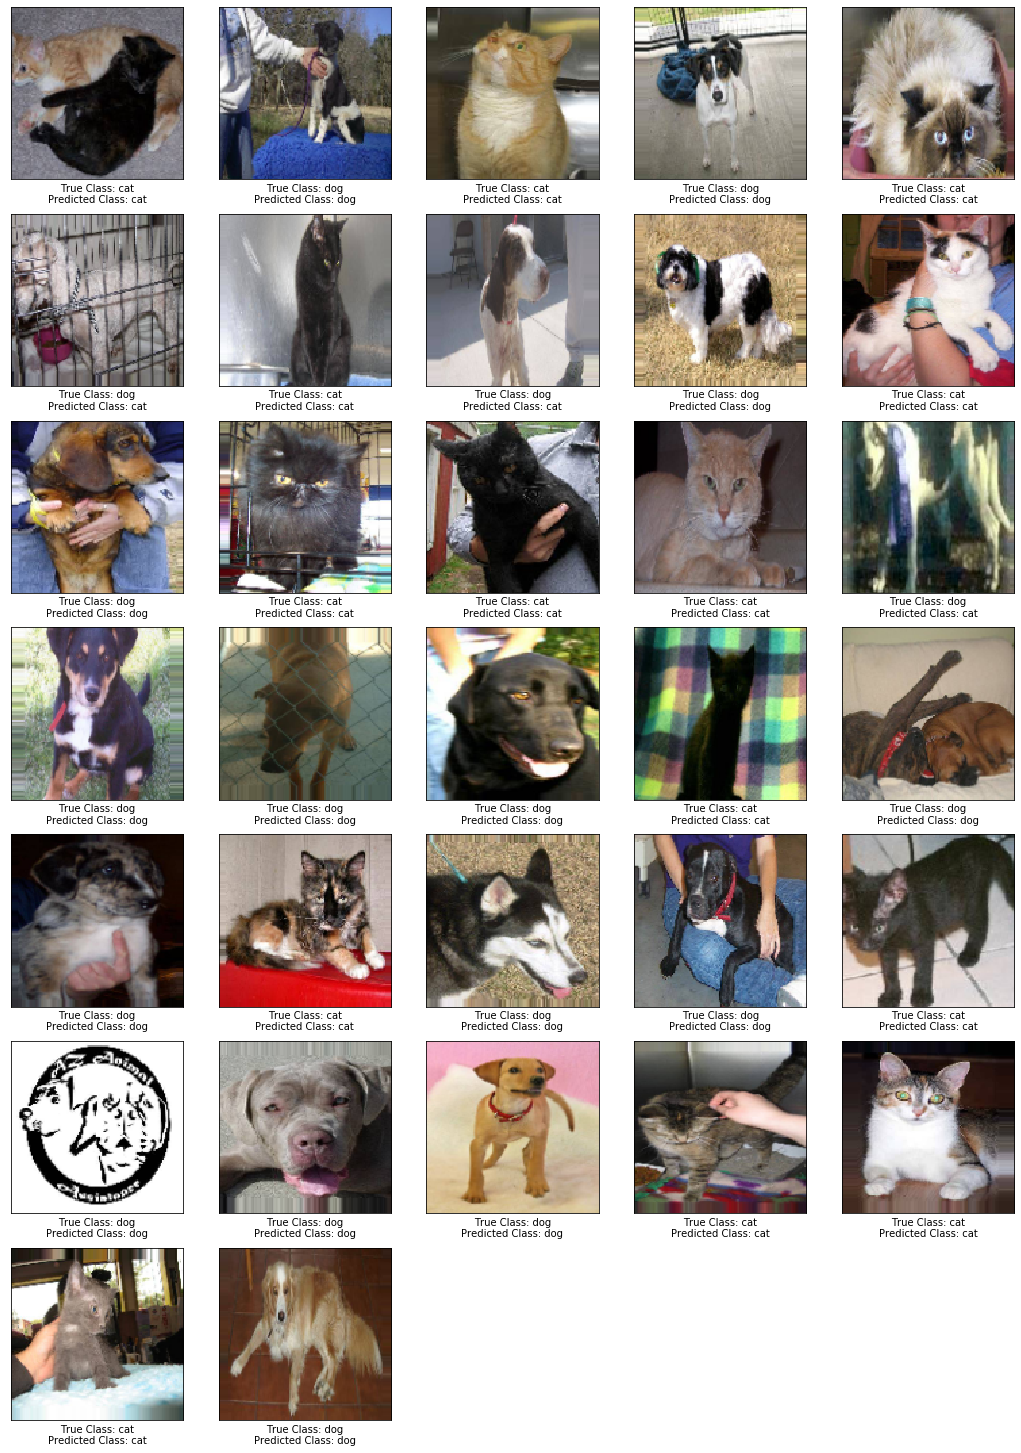

In [34]:
y_sample = cnn.predict_classes(images)

plt.figure(figsize=(18, 26))
for i in range(32):
    plt.subplot(7, 5, i+1)
    plt.xticks([])
    plt.yticks([])

    lbl = int(labels[i])
    lbl_pred = int(y_sample[i])
    plt.xlabel('True Class: ' + str(encoding[lbl]) + '\nPredicted Class: ' + str(encoding[lbl_pred]))
    plt.imshow(images[i])

plt.show()

Accuracy:	0.90625
Precision:	1.0
Recall:		0.8333333333333334
F1:		0.9090909090909091




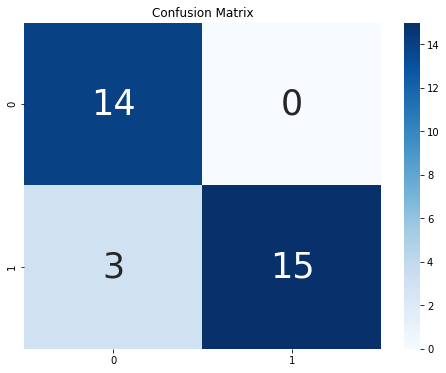

In [35]:
report(labels, y_sample)

In [43]:
#Saving the model
cnn.save('model.h5')

## Testing on the same cat with different pictures

In [124]:
cats = 15

val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory('val',
                                            target_size = target_size,
                                            batch_size = cats,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 15 images belonging to 2 classes.


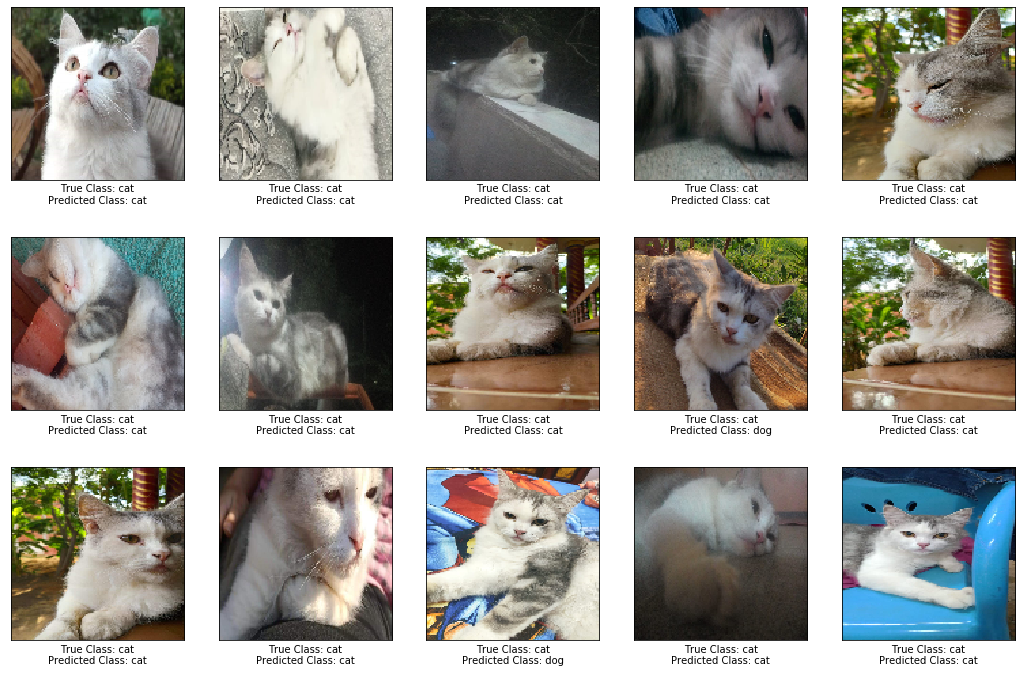

In [125]:
imgs, _ = val_set.next()
y_val = cnn.predict_classes(imgs)

plt.figure(figsize=(18, 12))
for i in range(cats):
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])

    lbl = 0
    lbl_pred = int(y_val[i])
    plt.xlabel('True Class: ' + str(encoding[lbl]) + '\nPredicted Class: ' + str(encoding[lbl_pred]))
    plt.imshow(imgs[i])

plt.show()